<a href="https://colab.research.google.com/github/revaldianggara/PeyankitKentang/blob/master/Vgg16_95%25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install keras==2.2.4

     |████████████████████████████████| 317kB 3.5MB/s 
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5


In [3]:
pip install tensorflow-gpu==1.15.0

     |████████████████████████████████| 411.5MB 33kB/s 
     |████████████████████████████████| 3.8MB 35.1MB/s 
     |████████████████████████████████| 512kB 52.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=b9c14aa297c8b5941fb32eb9477fb74c68f49918e6174e1e95c1251b864a28be
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc1 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc1 has requirement tensorboard<2.2.0,>=2.1.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.2.0rc1 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
  Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2.1.1
  Found existing installation: gast 0.

In [1]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [0]:
downloaded = drive.CreateFile({'id':"1hxYanI19DTQrEKgmlgCeoLo7xhW_uTEB"}) 
downloaded.GetContentFile('transfer_learning.zip')


In [5]:
! unzip transfer_learning.zip

Streaming output truncated to the last 5000 lines.
  inflating: transfer_learning/kentang_7128_tv/train/healthy/healthy (1183).JPG  
  inflating: transfer_learning/kentang_7128_tv/train/healthy/healthy (1184).JPG  
  inflating: transfer_learning/kentang_7128_tv/train/healthy/healthy (1185).JPG  
  inflating: transfer_learning/kentang_7128_tv/train/healthy/healthy (1186).JPG  
  inflating: transfer_learning/kentang_7128_tv/train/healthy/healthy (1187).JPG  
  inflating: transfer_learning/kentang_7128_tv/train/healthy/healthy (1188).JPG  
  inflating: transfer_learning/kentang_7128_tv/train/healthy/healthy (1189).JPG  
  inflating: transfer_learning/kentang_7128_tv/train/healthy/healthy (119).JPG  
  inflating: transfer_learning/kentang_7128_tv/train/healthy/healthy (1190).JPG  
  inflating: transfer_learning/kentang_7128_tv/train/healthy/healthy (1191).JPG  
  inflating: transfer_learning/kentang_7128_tv/train/healthy/healthy (1192).JPG  
  inflating: transfer_learning/kentang_7128_tv/t

In [6]:
%cd /content/transfer_learning

/content/transfer_learning


In [7]:
import numpy as np
import os
import time
from vgg16 import VGG16
from keras.preprocessing import image
from imagenet_utils import preprocess_input, decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge
from keras.layers import Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [8]:
img_path = '/content/transfer_learning/Data Uji/PotatoEarlyBlight1.JPG'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
print (x.shape)

(224, 224, 3)


In [9]:
x = np.expand_dims(x, axis=0)
print (x.shape)
x = preprocess_input(x)
print('Input image shape:', x.shape)

(1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)


In [0]:
PATH = os.getcwd()
data_path = PATH + '/kentang_7128'
data_dir_list = os.listdir(data_path)

In [0]:
img_data_list=[]

In [12]:
for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		img_path = data_path + '/'+ dataset + '/'+ img
		img = image.load_img(img_path, target_size=(224, 224))
		x = image.img_to_array(img)
		x = np.expand_dims(x, axis=0)
		x = preprocess_input(x)
#		x = x/255
		print('Input image shape:', x.shape)
		img_data_list.append(x)

Streaming output truncated to the last 5000 lines.
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image s

In [13]:
img_data = np.array(img_data_list)
#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)

(7128, 1, 224, 224, 3)
(1, 7128, 224, 224, 3)
(7128, 224, 224, 3)


In [0]:
num_classes = 3
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

In [0]:
labels[0:2424]=0
labels[2424:4704]=1
labels[4704:7128]=2

In [0]:
names = ['early_blight','late_blight','healthy']

In [0]:
Y = np_utils.to_categorical(labels, num_classes)

In [0]:
x,y = shuffle(img_data,Y, random_state=2)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)

In [20]:
image_input = Input(shape=(224, 224, 3))

model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')
model.summary()
last_layer = model.get_layer('fc2').output
#x= Flatten(name='flatten')(last_layer)
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()

for layer in custom_vgg_model.layers[:-1]:
	layer.trainable = False

custom_vgg_model.layers[3].trainable

custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


t=time.time()
#	t = now()
hist = custom_vgg_model.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))






553467904/553467096 [==============================] - 6s 0us/step






_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________

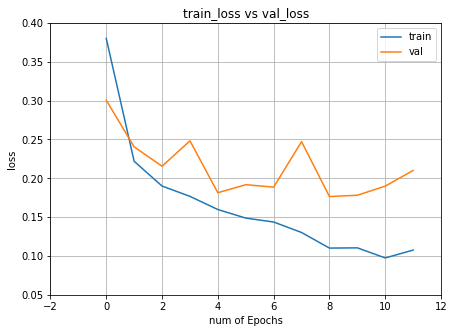

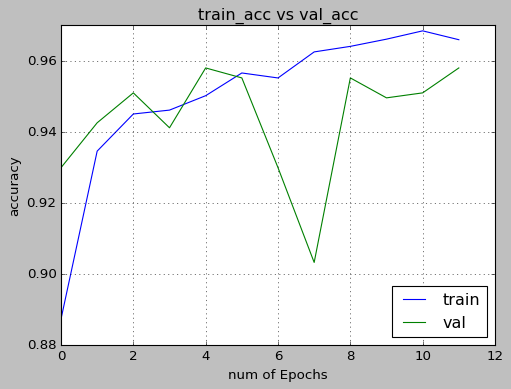

In [21]:
import matplotlib.pyplot as plt
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(12)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
